In [1]:
# # !pip install seaborn
# # !pip install scipy
# # !pip install ipywidgets
# !pip install torch

In [1]:

import numpy as np
from glicko2 import load_data
import seaborn as sns
import pandas as pd
import torch

In [2]:
data = load_data()
index = ["" for _ in data]
new_ratings = [0 for _ in data]
for entry in data:
    index[data[entry]["index"]] = (int(round(data[entry]["full_elo"])), entry)
    new_ratings[data[entry]["index"]] = data[entry]["full_elo"]
print(index)
# ratings = np.array([i[0] for i in index])
# ratings = ratings/(400 * np.log10(np.e)) - np.mean(ratings/(400 * np.log10(np.e))) + 1500
# index = [(int(round(r)),i[1]) for r,i in zip(ratings,index)]
# print(index)


[(1507, 'floyd_combined'), (1517, 'moves'), (1612, 'floyd'), (1557, 'floyd_u'), (1497, 'markers'), (1330, 'random'), (1540, 'connections'), (1597, 'floyd_d=2'), (1343, 'negative_floyd')]


In [3]:
wins1 = np.load("scores/wins1.npy")
draws1 = np.load("scores/draws1.npy")
losses1 = np.load("scores/losses1.npy")
wins2 = np.load("scores/wins2.npy")
draws2 = np.load("scores/draws2.npy")
losses2 = np.load("scores/losses2.npy")


In [4]:
wins = wins1 + wins2
wins = wins - np.diag(np.diag(wins))
losses = losses1 + losses2
losses = losses - np.diag(np.diag(losses))
total_games = wins1+losses1+draws1+wins2+losses2+draws2
total_games = total_games - np.diag(np.diag(total_games))

for _ in range(100):
    ratings = new_ratings
    total_ratings = np.zeros(losses1.shape)

    for entry in data:
        i = data[entry]["index"]
    # ratings if same games were repeated
        total_ratings[:,i] = ratings[i] * (wins1[:,i] + losses1[:,i] + draws1[:,i] + wins2[:,i] + losses2[:,i] + draws2[:,i])


    new_ratings = np.sum(total_ratings + 400 * (wins - losses), axis = 1)/np.sum(total_games, axis=1)
    m = np.mean(new_ratings)
    new_ratings = [r-m+1500 for r in new_ratings]
print(ratings)
print(new_ratings)

[1504.306524268799, 1554.3039376121196, 1730.4544422777149, 1602.2434238445176, 1529.9302601115064, 1235.5363974064635, 1574.7467603343641, 1647.9150753857803, 1120.5631787587354]
[1504.3065242687987, 1554.3039376121192, 1730.4544422777144, 1602.243423844517, 1529.9302601115066, 1235.536397406463, 1574.7467603343641, 1647.91507538578, 1120.5631787587351]


In [5]:
index = [(int(round(nr)),name[1]) for nr, name in zip(new_ratings,index)]
print(sum(sum(total_games)))

198.0


Average score for row against column


/var/folders/ff/470jpnz56h1bd5p_m1kcxwyc0000gn/T/ipykernel_54838/1070782180.py:1: RuntimeWarning: invalid value encountered in divide
  arr = ( 1


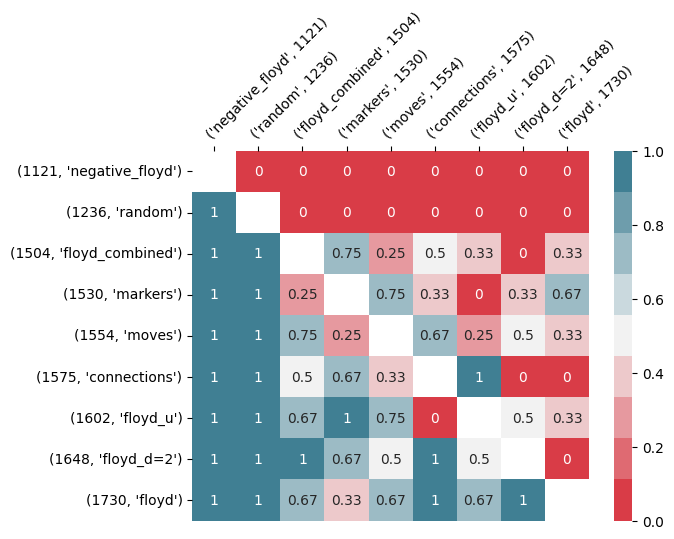

In [10]:
arr = ( 1
    * wins1
    + wins2 
    + 0.5 * draws1 
    + 0.5 * draws2
    # - losses1
    # - losses2
    ) /  (1 
        * wins1 
        + losses1 
        + wins2 
        + losses2
        + draws1 
        + draws2 
    )
arr = arr - np.diag(np.diag(arr))
new_order = sorted(list(zip(list(range(len(index))), index)), key = lambda x: x[1][0])
new_index = [index[i[0]] for i in new_order]
new_arr = np.zeros(arr.shape)
for ni, ai in enumerate(new_order):
    new_arr[ni,:] = arr[ai[0],:]
for ai, ni in enumerate(new_order):
    arr[:,ai] = new_arr[:, ni[0]]
del new_arr
try:
    del df
except:
    pass
df = pd.DataFrame(data = arr, index = new_index, columns = new_index)
ax = sns.heatmap(df,annot=True, #annot_kws={'rotation': 60},
# vmax=1, 
# vmin=0,#mask = np.eye(arr.shape[0]),
cmap = [(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)][::-1], #kwargs={title: "average score of row versus column"}
)
ax.set_xticks([i+0.5 for i in range(len(new_index))],labels=[str((s[1], s[0])) for s in new_index],rotation=45, ha="left",
         rotation_mode="anchor"
         )

ax.xaxis.set_ticks_position('top')
print("Average score for row against column")

In [8]:
df2 = df.sum(axis=1)
# sns.heatmap(df2)
df2.head(10)

(1045, negative_floyd)   -3.000000
(1216, random)           -4.000000
(1409, floyd_combined)   -2.333333
(1513, moves)            -1.666667
(1566, floyd_d=2)         0.000000
(1574, markers)           1.000000
(1645, floyd_u)           4.000000
(1730, connections)       2.000000
(1803, floyd)             4.000000
dtype: float64

In [9]:
sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]